#### Uses this article as a model: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA

In [3]:
data = pd.read_csv("./Resources/Clean_Data/Final_Data.csv")

In [4]:

time_series_data = data.filter(['Zip_Code', 'Date', 'Total_Sales'], axis=1)
time_series_data.Date=pd.to_datetime(time_series_data['Date'])
zip_grouped = time_series_data.groupby(['Zip_Code'])
fl_grouped = time_series_data.groupby(['Date'], as_index=False)['Total_Sales'].mean()
fl_grouped_df = pd.DataFrame(fl_grouped)
fl_grouped_arima = fl_grouped.set_index("Date")
# groups = dict(list(grouped))

# series['Date'] = [mdates.date2num(d) for d in series['Date']]
# for key in groups.keys():
#     print(key)



In [5]:
print(fl_grouped)

         Date  Total_Sales
0  2019-01-01    33.403935
1  2019-02-01    29.417056
2  2019-03-01    26.975323
3  2019-04-01    45.906286
4  2019-05-01    45.821388
5  2019-06-01    43.517123
6  2019-07-01    49.725000
7  2019-08-01    43.937358
8  2019-09-01    43.271689
9  2019-10-01    45.216155
10 2019-11-01    40.806636
11 2019-12-01    46.351873
12 2020-01-01    36.653409
13 2020-02-01    38.873143
14 2020-03-01    46.310148
15 2020-04-01    36.204152
16 2020-05-01    31.969037
17 2020-06-01    45.411565
18 2020-07-01    52.830296
19 2020-08-01    49.973684
20 2020-09-01    49.851429
21 2020-10-01    51.471871
22 2020-11-01    45.289323
23 2020-12-01    51.659817
24 2021-01-01    39.463835
25 2021-02-01    45.540000
26 2021-03-01    36.545012


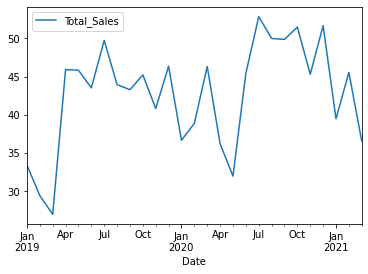

In [6]:
fl_grouped.plot(x='Date', y='Total_Sales')
plt.show()

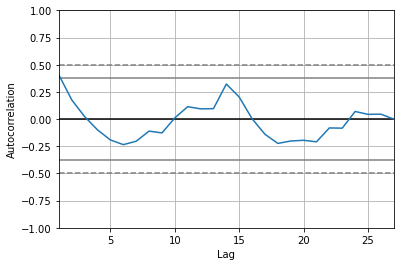

In [7]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(fl_grouped.set_index('Date'))
plt.show()

### For Florida, auto-correlation in the time series reveals sub-optimal correlation across the time series. Chose 4 for starting point for AR parameter of the model for consistency with other ARIMA data.


In [9]:
data=pd.Series(fl_grouped.Total_Sales.values, index=fl_grouped.Date)

C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -86.203
Date:                Fri, 04 Jun 2021   AIC                            184.406
Time:                        12:37:40   BI

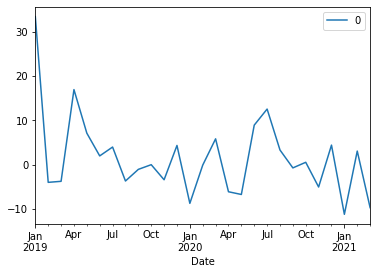

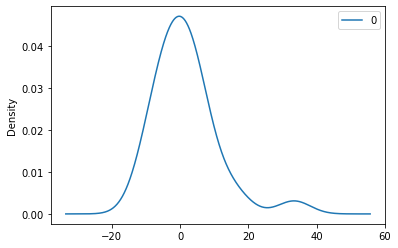

               0
count  27.000000
mean    1.562462
std     9.194195
min   -11.199813
25%    -3.870601
50%    -0.001411
75%     4.377696
max    33.403935


In [10]:
# fit model
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [11]:
#Predict total sales mean for Florida for 4-21
yhat=model_fit.forecast()
print(yhat)

2021-04-01    38.046397
Freq: MS, dtype: float64


In [12]:
#Predict median home price for Florida based on time series another way
yhat_2 = model_fit.predict(start=len(data), end=len(data))
print(yhat_2)

2021-04-01    38.046397
Freq: MS, dtype: float64


In [13]:
# Work with zip code time series

zip_grouped_df = pd.DataFrame(zip_grouped)
# zip_grouped_df[1][0]
zip_32003 = zip_grouped_df[1][0]
zip_32003


,Zip_Code,Date,Total_Sales
0,32003,2019-01-01,32
1,32003,2019-02-01,41
2,32003,2019-03-01,21
3,32003,2019-04-01,42
4,32003,2019-05-01,66
5,32003,2019-06-01,43
6,32003,2019-07-01,90
7,32003,2019-08-01,64
8,32003,2019-09-01,50
9,32003,2019-10-01,57


In [14]:
zip_groups = zip_grouped_df[1]
zip_group_array = []
for i in zip_groups:
    zip_group_array.append(i)
print(zip_group_array[54])

      Zip_Code       Date  Total_Sales
1310     32131 2019-01-01            6
1311     32131 2019-02-01            8
1312     32131 2019-03-01            3
1313     32131 2019-04-01            4
1314     32131 2019-05-01           10
1315     32131 2019-06-01            7
1316     32131 2019-07-01            7
1317     32131 2019-08-01            4
1318     32131 2019-09-01            7
1319     32131 2019-10-01           13
1320     32131 2019-11-01            5
1321     32131 2019-12-01            3
1322     32131 2020-01-01            5
1323     32131 2020-02-01            9
1324     32131 2020-03-01           14
1325     32131 2020-04-01           10
1326     32131 2020-05-01           10
1327     32131 2020-06-01            8
1328     32131 2020-07-01           12
1329     32131 2020-08-01            7
1330     32131 2020-09-01            7
1331     32131 2020-10-01           18
1332     32131 2020-11-01            9
1333     32131 2020-12-01           11
1334     32131 2021-01-01

In [15]:
reports={}
for i in zip_group_array:
    # current_group = zip_group_array[i]
    # j = current_group.Zip_Code.nunique()
    try:
        j = str(i.Zip_Code.unique().item(0))
        # print(j)
        i.drop("Zip_Code", axis=1)
        i.set_index("Date")
        data=pd.Series(i.Total_Sales.values, index=i.Date)
        # fit model
        model = ARIMA(data, order=(4,1,0))
        model_fit = model.fit()


        # summary of fit model
        # print(model_fit.summary())
        # line plot of residuals
        residuals = pd.DataFrame(model_fit.resid)
        # residuals.plot()
        # plt.show()
        # density plot of residuals
        # residuals.plot(kind='kde')
        # plt.show()
        # summary stats of residuals
        # print(residuals.describe())
        yhat=model_fit.forecast()[0]
        # print(j, yhat)
        reports[j] = yhat
    
    except:
        pass

 be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning

In [16]:
print(reports)

29.94522539981002, '32309': 47.40348256618441, '32310': 16.85736605499787, '32311': 42.7985200823248, '32312': 56.41115041895534, '32317': 26.06135567364519, '32320': 4.362571570229324, '32327': 34.46297505345105, '32328': 9.9518180734139, '32333': 10.479554120064474, '32344': 9.692104216643111, '32346': 4.1097116763408135, '32347': 9.91652503579412, '32348': 18.4692494382423, '32359': 5.228362626799855, '32401': 34.06400815210128, '32404': 65.11528036713496, '32405': 49.368136339542694, '32407': 62.31091472154223, '32408': 130.7217940244071, '32410': 4.356418533393706, '32413': 148.52965951347903, '32425': 4.111500514056734, '32428': 6.902774352076105, '32433': 21.87850852995826, '32435': 9.858111513573554, '32438': 2.8951592267486266, '32439': 40.26935942049361, '32444': 29.92839007305487, '32446': 16.839953462886452, '32448': 7.340079162303573, '32456': 26.122293866417102, '32459': 221.39871813332525, '32465': 7.227193309080508, '32466': 5.481270892175833, '32501': 15.18233613237592

In [18]:
zip_code_april_2021_total_preds = pd.DataFrame.from_dict(reports, orient='index')
zip_code_april_2021_total_preds = zip_code_april_2021_total_preds.reset_index()
zip_code_april_2021_total_preds = zip_code_april_2021_total_preds.rename(columns={'index':'Zip_Code',0:'ARIMA_Total_Sales'})
ARIMA_path = os.path.abspath('Resources/ML_Outputs/April_2021_total_preds_by_zip.csv')
zip_code_april_2021_total_preds.to_csv(ARIMA_path, index=False)
zip_code_april_2021_total_preds.head()

,Zip_Code,ARIMA_Total_Sales
0,32003,45.042097
1,32011,20.501601
2,32024,14.818636
3,32025,15.483942
4,32033,3.934077


In [28]:
# Bins for 'high growth', 'low growth', and 'loss' groups
# growth_bins = {}
# for name, values in 

# fl_grouped = time_series_data.groupby(['Date'], as_index=False)['Sale_Price'].mean()
# fl_grouped_df = pd.DataFrame(fl_grouped)
# fl_grouped_arima = fl_grouped.set_index("Date")

In [19]:
print(len(zip_code_april_2021_total_preds))

794
